In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
comp_data = pd.read_csv("train.csv" ).drop('id', axis=1)
original_data = pd.read_csv('horse.csv')
all_train = pd.concat([comp_data,original_data],ignore_index=True)
all_train = all_train.drop_duplicates()

all_train.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data,outcome
0,yes,adult,530001,38.1,132.0,24.0,cool,reduced,dark_cyanotic,more_3_sec,...,57.0,8.5,serosanguious,3.4,yes,2209,0,0,no,died
1,yes,adult,533836,37.5,88.0,12.0,cool,normal,pale_cyanotic,more_3_sec,...,33.0,64.0,serosanguious,2.0,yes,2208,0,0,no,euthanized
2,yes,adult,529812,38.3,120.0,28.0,cool,reduced,pale_pink,less_3_sec,...,37.0,6.4,serosanguious,3.4,yes,5124,0,0,no,lived
3,yes,adult,5262541,37.1,72.0,30.0,cold,reduced,pale_pink,more_3_sec,...,53.0,7.0,cloudy,3.9,yes,2208,0,0,yes,lived
4,no,adult,5299629,38.0,52.0,48.0,normal,normal,normal_pink,less_3_sec,...,47.0,7.3,cloudy,2.6,no,0,0,0,yes,lived


In [3]:
all_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1531 entries, 0 to 1533
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                1531 non-null   object 
 1   age                    1531 non-null   object 
 2   hospital_number        1531 non-null   int64  
 3   rectal_temp            1471 non-null   float64
 4   pulse                  1507 non-null   float64
 5   respiratory_rate       1473 non-null   float64
 6   temp_of_extremities    1436 non-null   object 
 7   peripheral_pulse       1402 non-null   object 
 8   mucous_membrane        1463 non-null   object 
 9   capillary_refill_time  1493 non-null   object 
 10  pain                   1432 non-null   object 
 11  peristalsis            1467 non-null   object 
 12  abdominal_distention   1452 non-null   object 
 13  nasogastric_tube       1348 non-null   object 
 14  nasogastric_reflux     1404 non-null   object 
 15  nasogastr

In [4]:
all_train.isna().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       95
peripheral_pulse         129
mucous_membrane           68
capillary_refill_time     38
pain                      99
peristalsis               64
abdominal_distention      79
nasogastric_tube         183
nasogastric_reflux       127
nasogastric_reflux_ph    246
rectal_exam_feces        292
abdomen                  329
packed_cell_volume        29
total_protein             33
abdomo_appearance        213
abdomo_protein           198
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
outcome                    0
dtype: int64

In [5]:
target = "outcome"
cat_var = [feature for feature in all_train.columns if all_train[feature].dtype==object and feature!=target]
num_var = [feature for feature in all_train.columns if all_train[feature].dtype!=object]


print("Number of categorical variables: ", len(cat_var))
print("Number of numerical variables: ", len(num_var))

Number of categorical variables:  16
Number of numerical variables:  11


### Target

(array([486.,   0.,   0.,   0.,   0., 293.,   0.,   0.,   0., 752.]),
 array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2, 1.4, 1.6, 1.8, 2. ]),
 <BarContainer object of 10 artists>)

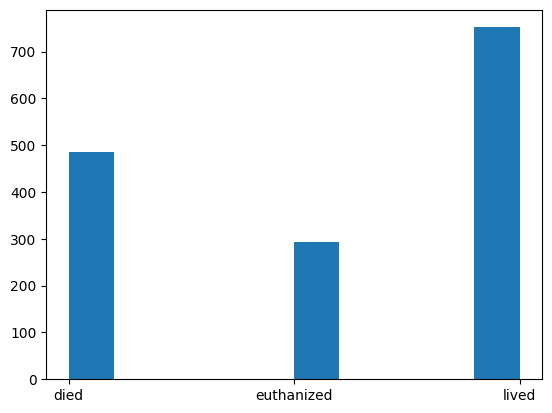

In [6]:
plt.hist(all_train['outcome'])

### Numerical Exploration

- No highly correlated variables 

<Axes: >

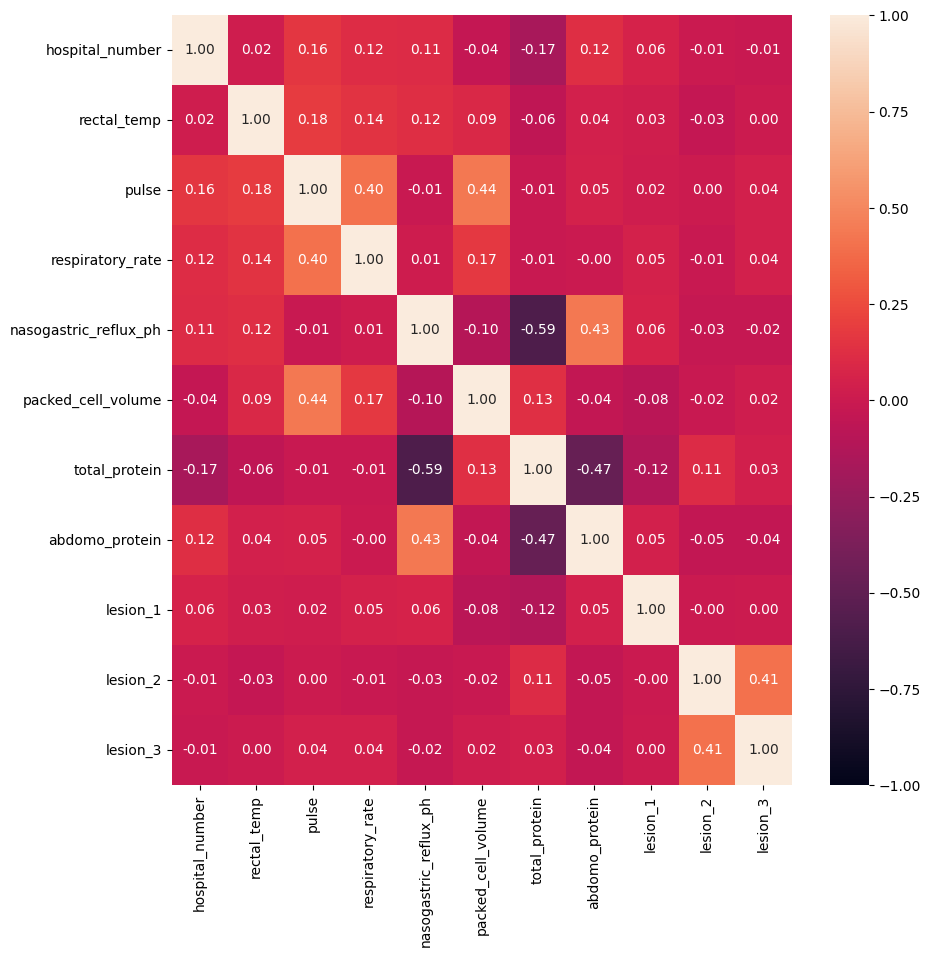

In [7]:
plt.figure(figsize=(10,10))
sb.heatmap(all_train[num_var].corr(), annot=True, fmt=".2f", vmax = 1, vmin = -1)

#### Relationship with Target
- useful features: pulse, nasogastric_reflux_ph, packed_cell_volume
- need more exploration: hospital_number, lesion_1, lesion_2, lesion_3, lesion_4


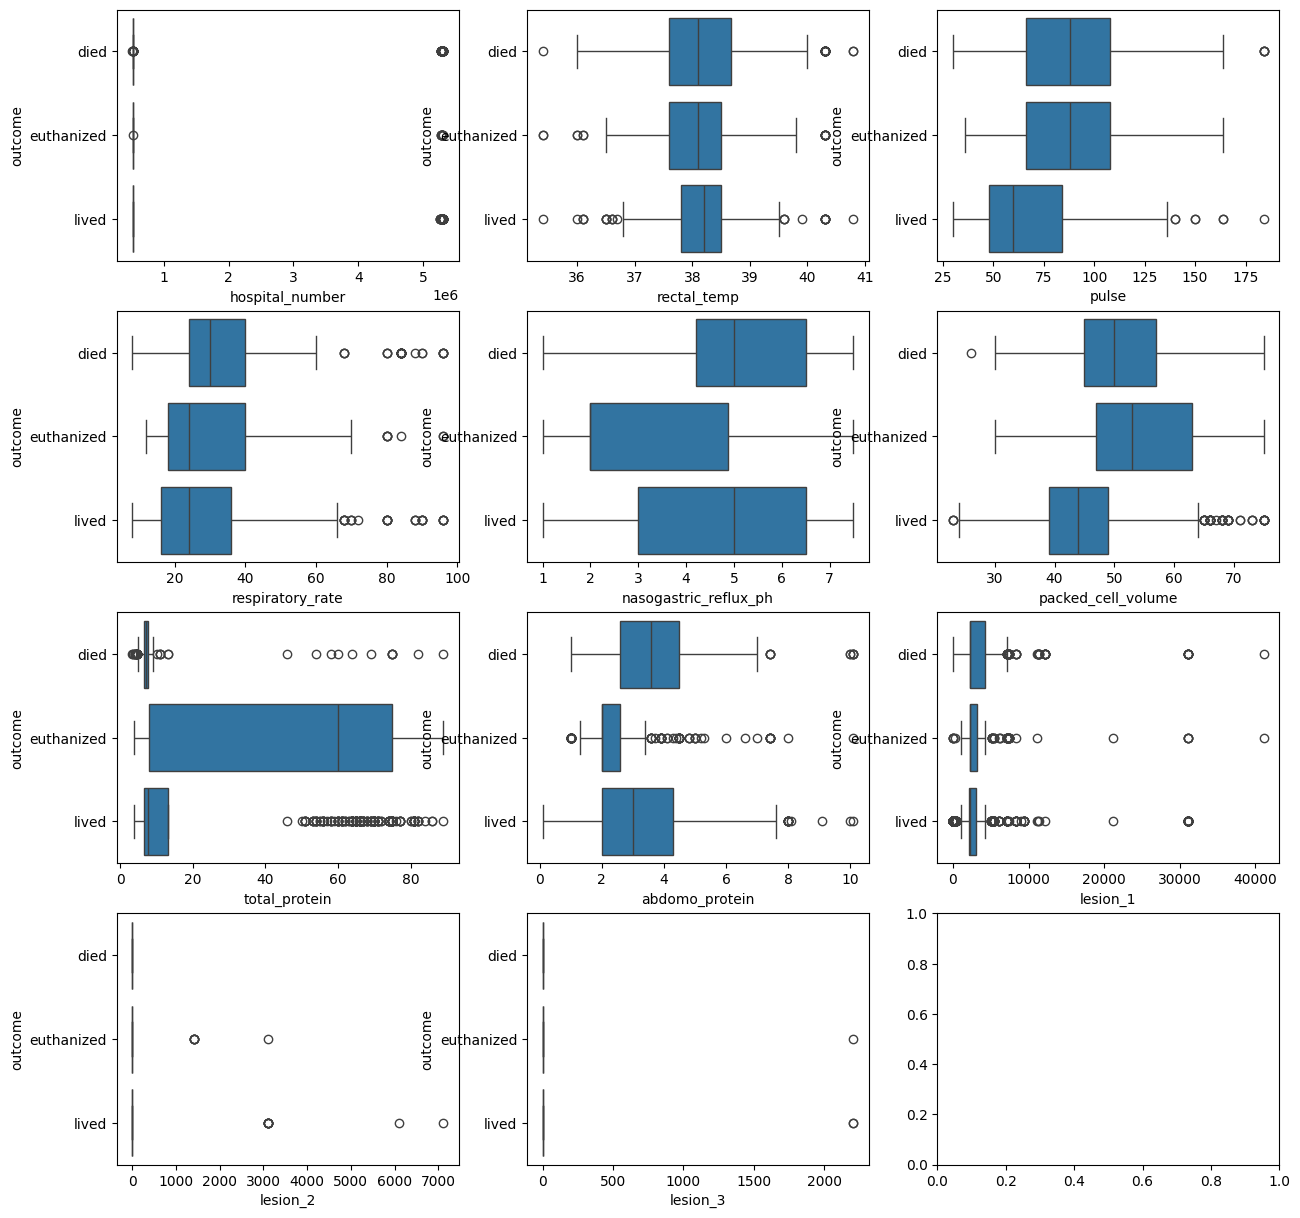

In [8]:
fig, ax = plt.subplots(4,3, figsize=(15,15))
i=0
j=0
for feature in num_var:
    sb.boxplot(x = feature, y = target, data = all_train, orient = "h", ax = ax[i][j])
    j+=1
    if j%3==0:
        j=0
        i+=1


In [21]:
all_train[num_var].describe()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
count,1.531000e+03,1471.000000,1507.000000,1473.000000,1285.000000,1502.000000,1498.000000,1333.000000,1531.000000,1531.000000,1531.000000
mean,9.782395e+05,38.196941,78.145985,30.105906,4.396109,49.017976,21.883044,3.269017,3801.345526,29.467015,4.328543
std,1.389757e+06,0.779873,29.077196,16.597691,1.940040,10.596155,26.799768,1.617140,5434.895232,337.075782,97.720282
min,5.184760e+05,35.400000,30.000000,8.000000,1.000000,23.000000,3.300000,0.100000,0.000000,0.000000,0.000000
25%,5.288040e+05,37.800000,52.000000,18.000000,2.000000,42.000000,6.600000,2.000000,2124.000000,0.000000,0.000000
50%,5.298270e+05,38.200000,72.000000,28.000000,4.500000,48.000000,7.500000,3.000000,2209.000000,0.000000,0.000000
75%,5.341970e+05,38.600000,96.000000,36.000000,6.200000,55.000000,13.000000,4.300000,3205.000000,0.000000,0.000000
max,5.305629e+06,40.800000,184.000000,96.000000,7.500000,75.000000,89.000000,10.100000,41110.000000,7111.000000,2209.000000


#### Statistical Test

In [9]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean') 
train_processed = pd.DataFrame(imputer.fit_transform(all_train[num_var]), columns =all_train[num_var].columns)
train_processed['outcome'] = all_train['outcome']


In [32]:
import scipy.stats as stats
import pingouin as pg
# import warnings 
# warnings.filterwarnings('ignore') 


lived = train_processed[train_processed['outcome']=="lived"]
euth = train_processed[train_processed['outcome']=="euthanized"]
died = train_processed[train_processed['outcome']=="died"]
print("Considering removing or Feature Engineer: ")
print("="*40)

for feature in num_var:
    l = lived[feature]
    e = euth[feature]
    d = died[feature]

    variance_p = stats.bartlett(l, e, d)
    if variance_p.pvalue<0.05:
       f_stat, p_value = pg.welch_anova(dv=feature, between='outcome', data=train_processed).loc[0,['F', 'p-unc']]

    else:
        f_stat, p_value = stats.f_oneway(l, e, d)
    if p_value>0.05:
        print(feature, "(F:",f_stat, "pvalue:", p_value, ")")



Considering removing or Feature Engineer: 
rectal_temp (F: 0.38471814771621554 pvalue: 0.680787612158207 )
lesion_1 (F: 0.929520756447241 pvalue: 0.3951615934120126 )
lesion_2 (F: 0.7423700321992532 pvalue: 0.47628602735569137 )
lesion_3 (F: 1.4995469938733945 pvalue: 0.22412770768403484 )


<!-- ### Categorical Exploration -->

### Categorical Exploration
- consider treating hospital_number, lesion_1, lesion_2, lesion_3 as cat_var

In [6]:
cat_var = ['surgery',
 'age',
 'temp_of_extremities',
 'peripheral_pulse',
 'mucous_membrane',
 'capillary_refill_time',
 'pain',
 'peristalsis',
 'abdominal_distention',
 'nasogastric_tube',
 'nasogastric_reflux',
 'rectal_exam_feces',
 'abdomen',
 'abdomo_appearance',
 'surgical_lesion',
 'cp_data'] +\
['hospital_number', 'lesion_1', 'lesion_2', 'lesion_3']

<Axes: xlabel='capillary_refill_time', ylabel='count'>

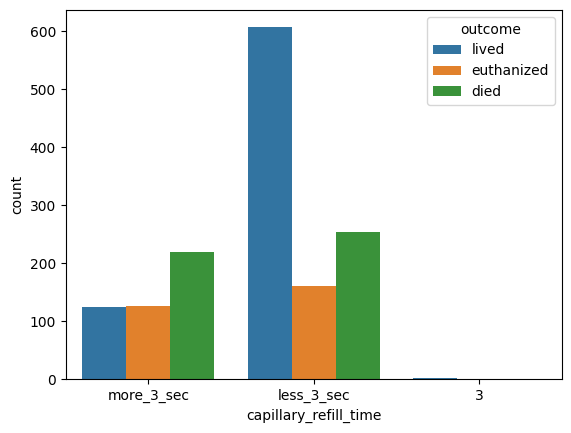

In [26]:
sb.countplot(hue = target , x = "capillary_refill_time", data = all_train, hue_order = ['lived', 'euthanized', 'died'])


<Axes: xlabel='capillary_refill_time', ylabel='count'>

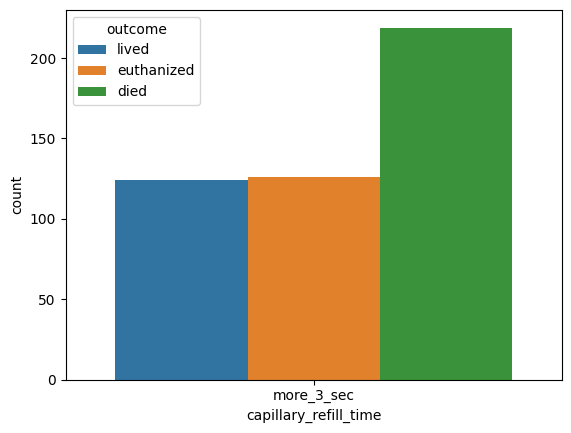

In [28]:
sb.countplot(hue = target , x = "capillary_refill_time", data = all_train[all_train["capillary_refill_time"]=="more_3_sec"], hue_order = ['lived', 'euthanized', 'died'])


<Axes: xlabel='capillary_refill_time', ylabel='count'>

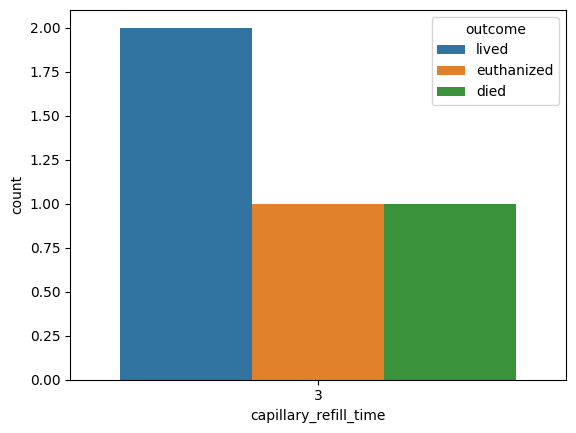

In [24]:
sb.countplot(hue = target , x = "capillary_refill_time", data = all_train[all_train["capillary_refill_time"]=="3"], hue_order = ['lived', 'euthanized', 'died'])


<Axes: xlabel='outcome', ylabel='count'>

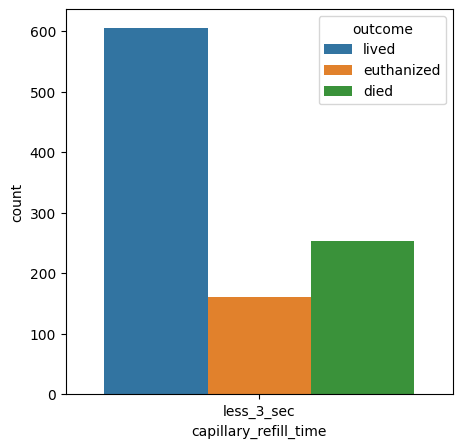

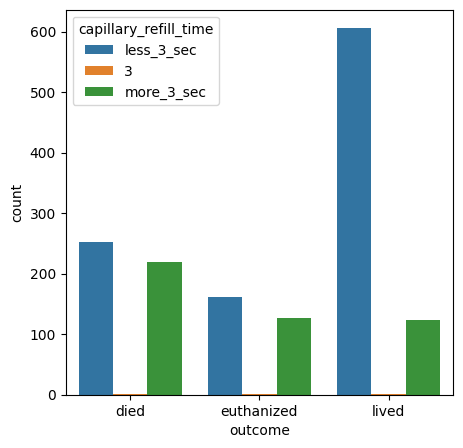

In [33]:
plt.figure(figsize=(5,5))
sb.countplot(hue = target , x = "capillary_refill_time", data = all_train[all_train["capillary_refill_time"]=="less_3_sec"], hue_order = ['lived', 'euthanized', 'died'])
plt.figure(figsize=(5,5))

sb.countplot(hue = "capillary_refill_time" , x = target, data = all_train, hue_order = ['less_3_sec', '3', 'more_3_sec'])


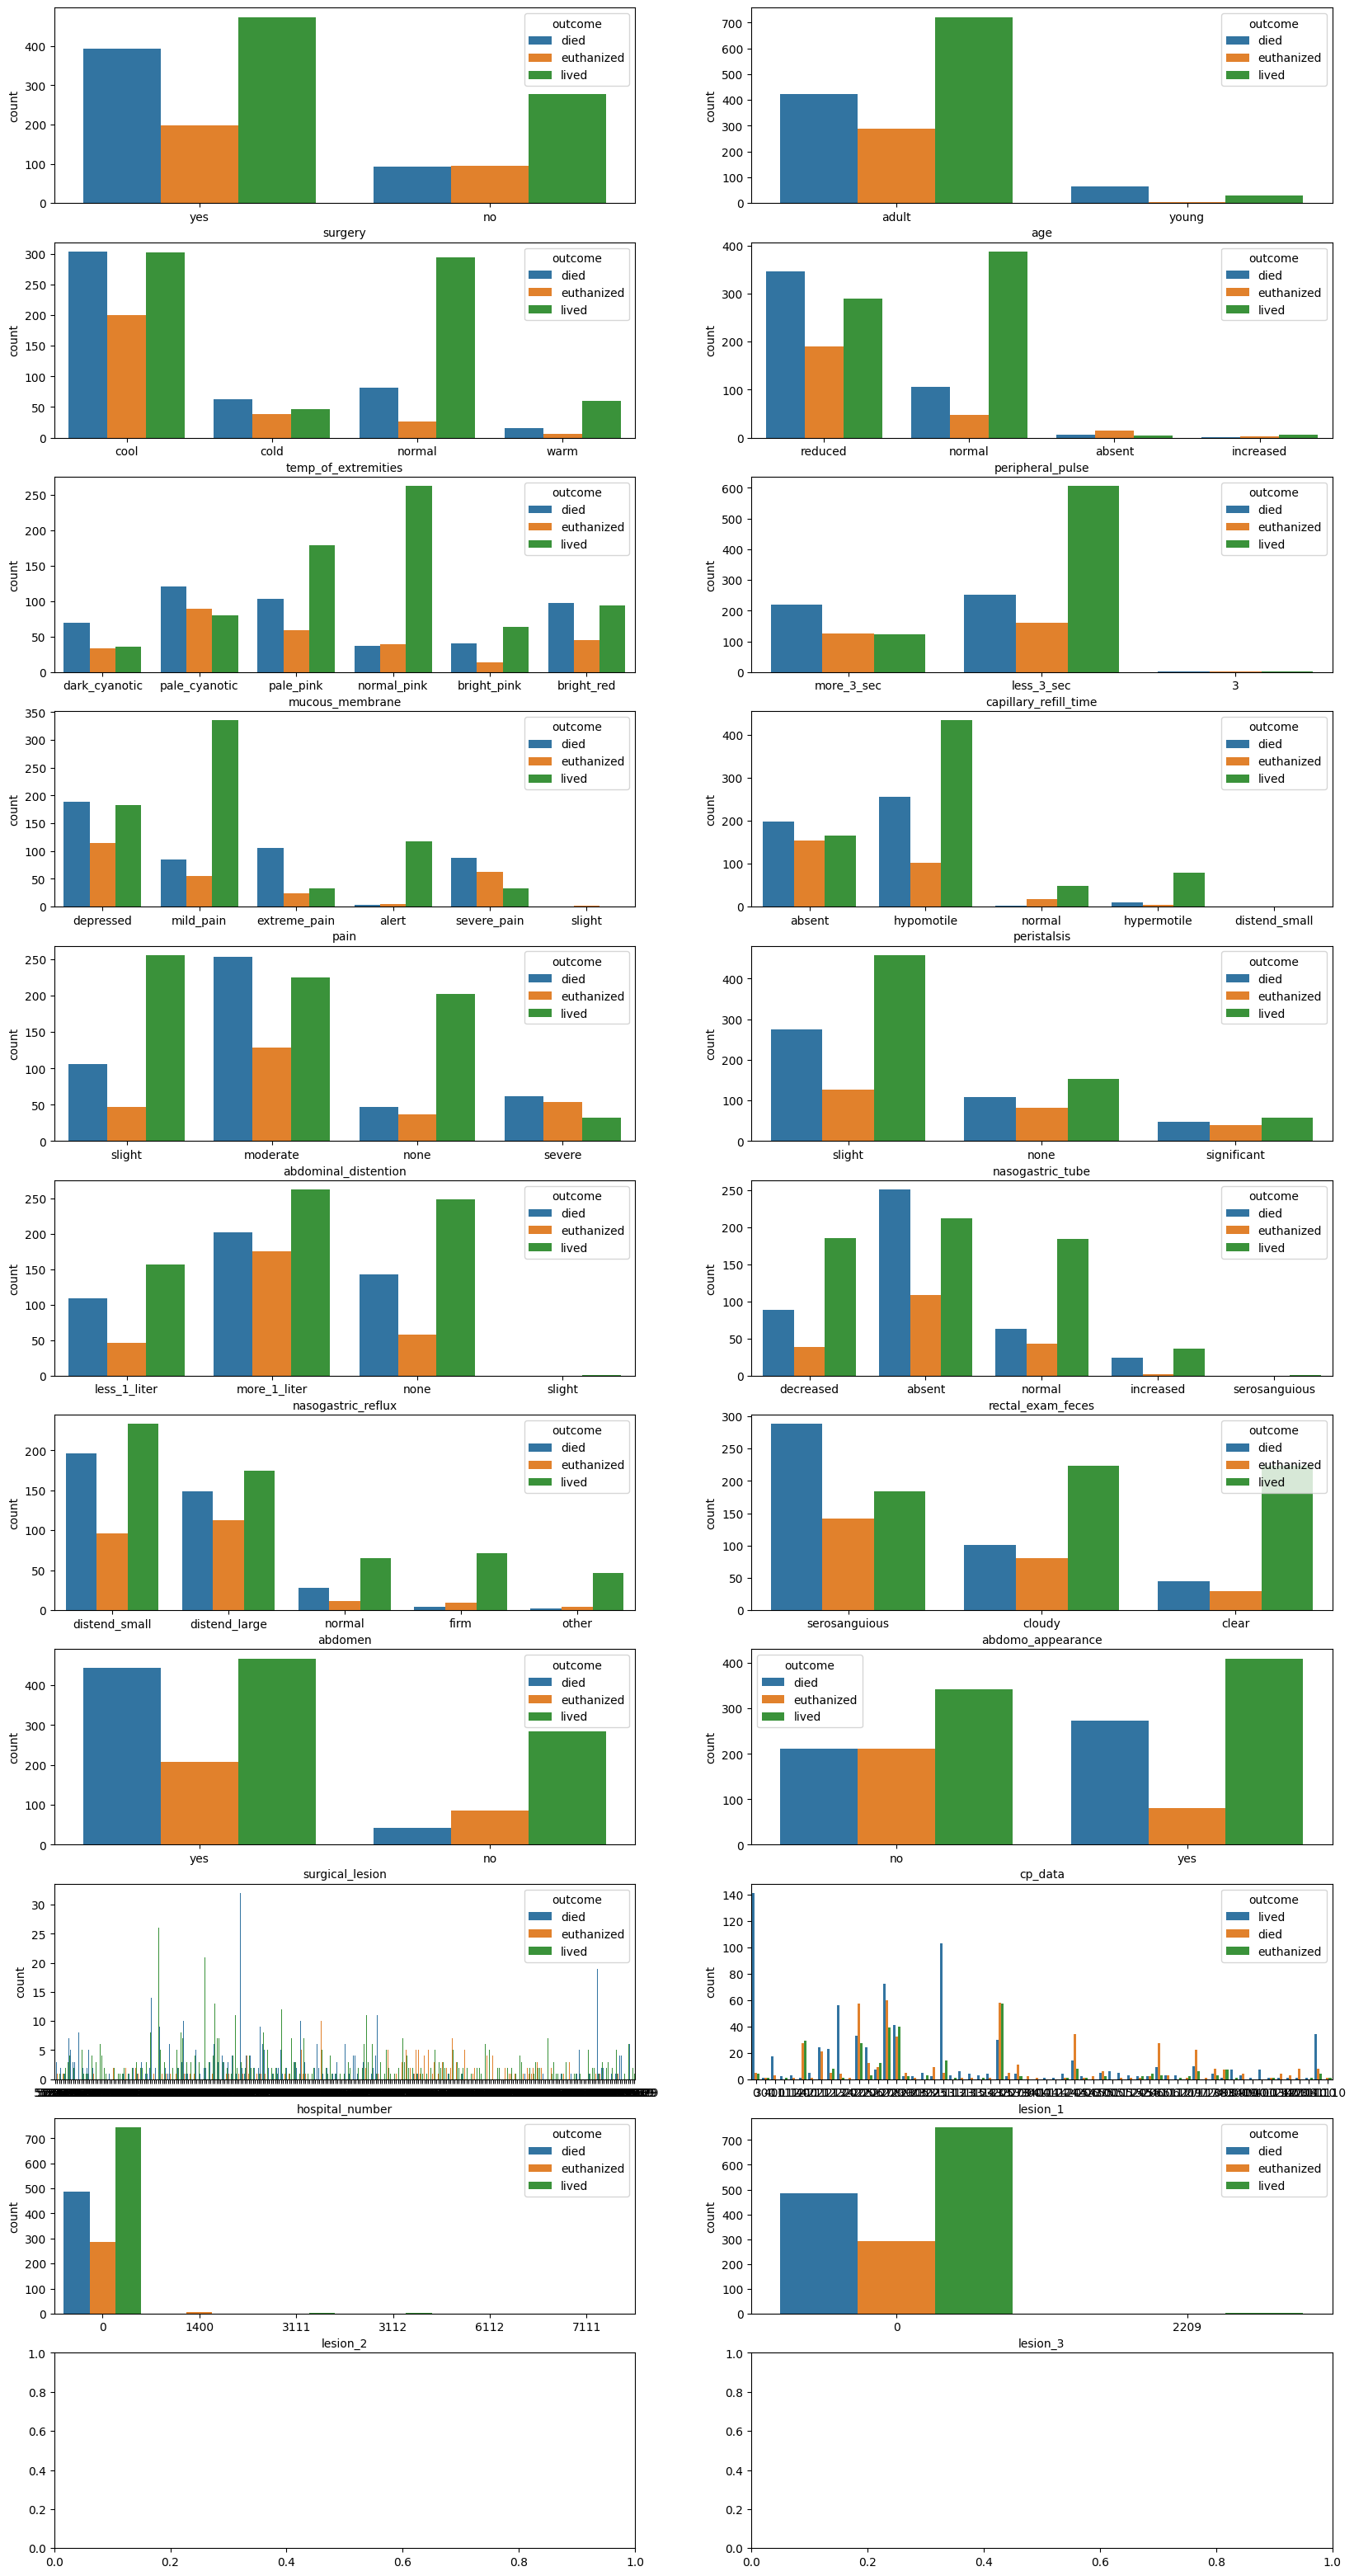

In [ ]:
fig, ax = plt.subplots(11,2, figsize=(20,30))
i=0
j=0
for feature in cat_var:
    sb.countplot(hue = target , x = feature, data = all_train, ax = ax[i][j])
    j+=1
    if j%2==0:
        j=0
        i+=1


#### Statistical Test

In [31]:
import scipy.stats as stats

print("Considering removing or Feature Engineer: ")
print("="*40)
for feature in cat_var:
    contingency_table = pd.crosstab(all_train[feature], all_train['outcome'])

    # Perform the chi-square test
    chi2, p, dof, expected = stats.chi2_contingency(contingency_table)
    if p>0.05:
        print(f"{feature} vs Outcome")
        print(f"Chi2 Statistic: {chi2}")
        print(f"P-value: {p}")
        print()


#Out of all categorical variables, only lesion_3 is not significant (i.e. dropped)



Considering removing or Feature Engineer: 
lesion_3 vs Outcome
Chi2 Statistic: 1.4591502080655367
P-value: 0.48211379478392746



### Further Investigation

#### hospital_number, lesion_1, lesion_2
- hospital_number, lesion_3 doesn't seem to be informative (drop)
- lesion_2 consider doing binary split (>0)

In [33]:
for feature in ["hospital_number", "lesion_1", "lesion_2", 'lesion_3']:
    print(feature, len(all_train[feature].unique()))

hospital_number 288
lesion_1 62
lesion_2 6
lesion_3 2


In [35]:
for feature in ["lesion_2", "lesion_3"]:
    display(pd.crosstab(all_train[feature], all_train['outcome']))

outcome,died,euthanized,lived
lesion_2,,,
0,486,287,743
1400,0,5,0
3111,0,1,4
3112,0,0,3
6112,0,0,1
7111,0,0,1


outcome,died,euthanized,lived
lesion_3,,,
0,486,292,750
2209,0,1,2
